### KNN Project Exercise 




### The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('sonar.all-data.csv')

In [65]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<AxesSubplot:>

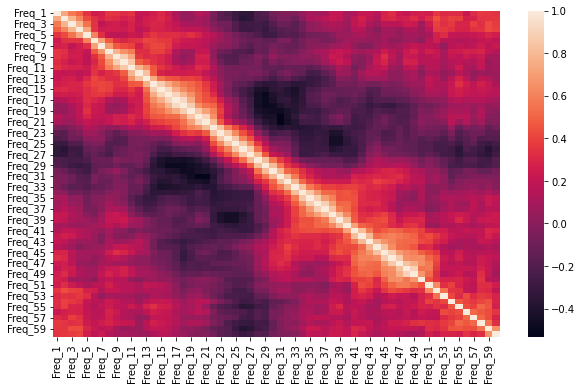

In [66]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr())

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [67]:
df['target'] = df['Label'].map({'R':0,'M':1})

In [68]:
abs((df.corr()['target']).sort_values().tail(6))

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
target     1.000000
Name: target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [70]:
X= df.drop(['Label','target'], axis =1)
y= df['target']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [74]:
scalar = StandardScaler()
knn_model = KNeighborsClassifier()

In [75]:
operation = [('scalar', scalar),('knn_model',knn_model)]

In [76]:
pipe = Pipeline(operation)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
k_values = list(range(1,30))

In [79]:
param_grid = {'knn_model__n_neighbors': k_values}

In [80]:
grid_model = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring= 'accuracy')

In [81]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20, 21, 22, 23,
                                                    24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [82]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=1),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [83]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn_model__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [86]:
grid_model.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

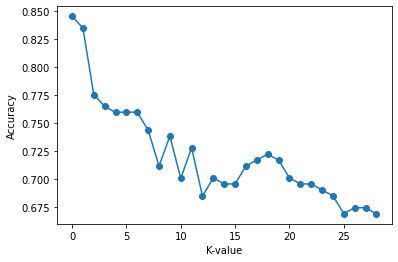

In [92]:
plt.plot(grid_model.cv_results_['mean_test_score'], 'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [94]:
scalar = StandardScaler()
knn_model = KNeighborsClassifier(n_neighbors=1)

In [95]:
operation = [('scalar', scalar), ('knn_model', knn_model)]

In [96]:
pipe = Pipeline(operation)

In [97]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('knn_model', KNeighborsClassifier(n_neighbors=1))])

In [98]:
y_pred = pipe.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [99]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1],
       [ 1, 12]], dtype=int64)

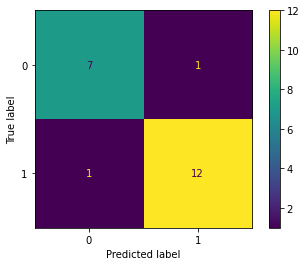

In [100]:
plot_confusion_matrix(estimator=pipe, X=X_test, y_true=y_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

